In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load all datasets
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phishingdataset/CEAS_08.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/phishingdataset/SpamAssasin.csv")

# Remove null values
df1 = df1.dropna()
df2 = df2.dropna()

# Convert data to X and Y variables
X1 = df1['body'].tolist()
Y1 = df1['label'].tolist()
X2 = df2['body'].tolist()
Y2 = df2['label'].tolist()

In [3]:
# Tokenize/Vectorize X variable texts
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the combined data of X1 and X2
X_combined = X1 + X2
vectorizer.fit(X_combined)
# Transform X1 and X2 using the fitted vectorizer
X1 = vectorizer.transform(X1)
X2 = vectorizer.transform(X2)

In [4]:
# Split data into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [5]:
# Initialize baseline models
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [6]:
# Train both models for first dataset
rf1_model = rf_model.fit(X1_train, Y1_train)
xgb1_model = xgb_model.fit(X1_train, Y1_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [7]:
# Train both models for second dataset
rf2_model = rf_model.fit(X2_train, Y2_train)
xgb2_model = xgb_model.fit(X2_train, Y2_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:44:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [8]:
# Get predictions
rf1_preds = rf1_model.predict(X1_test)
xgb1_preds = xgb1_model.predict(X1_test)
rf2_preds = rf2_model.predict(X2_test)
xgb2_preds = xgb2_model.predict(X2_test)

In [9]:
# Evaluation for first dataset
print("Random Forest Results:")
print(classification_report(Y1_test, rf1_preds, digits=7, target_names=["Non-Spam", "Spam"]))
print("XGBoost Results:")
print(classification_report(Y1_test, xgb1_preds, digits=7, target_names=["Non-Spam", "Spam"]))

Random Forest Results:
              precision    recall  f1-score   support

    Non-Spam  0.5102597 0.9419947 0.6619528      3379
        Spam  0.8689840 0.2985075 0.4443685      4355

    accuracy                      0.5796483      7734
   macro avg  0.6896218 0.6202511 0.5531606      7734
weighted avg  0.7122566 0.5796483 0.5394315      7734

XGBoost Results:
              precision    recall  f1-score   support

    Non-Spam  0.6490877 0.8632732 0.7410136      3379
        Spam  0.8574074 0.6378875 0.7315339      4355

    accuracy                      0.7363589      7734
   macro avg  0.7532475 0.7505803 0.7362737      7734
weighted avg  0.7663921 0.7363589 0.7356756      7734



In [10]:
# Evaluation for second dataset
print("Random Forest Results:")
print(classification_report(Y2_test, rf2_preds, digits=7, target_names=["Non-Spam", "Spam"]))
print("XGBoost Results:")
print(classification_report(Y2_test, xgb2_preds, digits=7, target_names=["Non-Spam", "Spam"]))

Random Forest Results:
              precision    recall  f1-score   support

    Non-Spam  0.9328537 0.9936143 0.9622758       783
        Spam  0.9823322 0.8323353 0.9011345       334

    accuracy                      0.9453894      1117
   macro avg  0.9575929 0.9129748 0.9317052      1117
weighted avg  0.9476485 0.9453894 0.9439936      1117

XGBoost Results:
              precision    recall  f1-score   support

    Non-Spam  0.9834184 0.9846743 0.9840459       783
        Spam  0.9639640 0.9610778 0.9625187       334

    accuracy                      0.9776186      1117
   macro avg  0.9736912 0.9728761 0.9732823      1117
weighted avg  0.9776012 0.9776186 0.9776090      1117



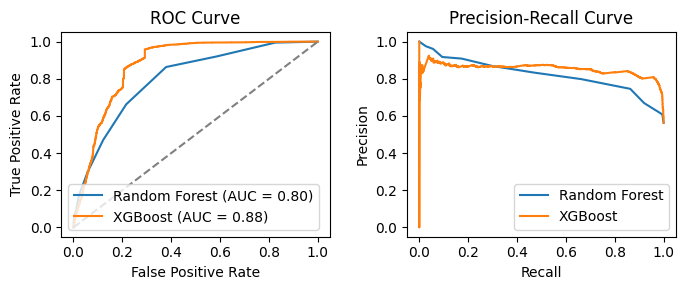

In [11]:
# For first dataset

# Compute ROC & AUC
rf1_probs = rf1_model.predict_proba(X1_test)[:, 1]  # Get probability scores
xgb1_probs = xgb1_model.predict_proba(X1_test)[:, 1]  # Get probability scores
fpr_rf1, tpr_rf1, _ = roc_curve(Y1_test, rf1_probs)
roc_auc_rf1 = auc(fpr_rf1, tpr_rf1)

fpr_xgb1, tpr_xgb1, _ = roc_curve(Y1_test, xgb1_probs)
roc_auc_xgb1 = auc(fpr_xgb1, tpr_xgb1)

# Compute Precision-Recall Curve
precision_rf1, recall_rf1, _ = precision_recall_curve(Y1_test, rf1_probs)
precision_xgb1, recall_xgb1, _ = precision_recall_curve(Y1_test, xgb1_probs)

# Plot ROC Curve & Precision-Recall Curve Side by Side
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# ROC Curve
axes[0].plot(fpr_rf1, tpr_rf1, label=f'Random Forest (AUC = {roc_auc_rf1:.2f})')
axes[0].plot(fpr_xgb1, tpr_xgb1, label=f'XGBoost (AUC = {roc_auc_xgb1:.2f})')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal baseline
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve")
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall_rf1, precision_rf1, label="Random Forest")
axes[1].plot(recall_xgb1, precision_xgb1, label="XGBoost")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()

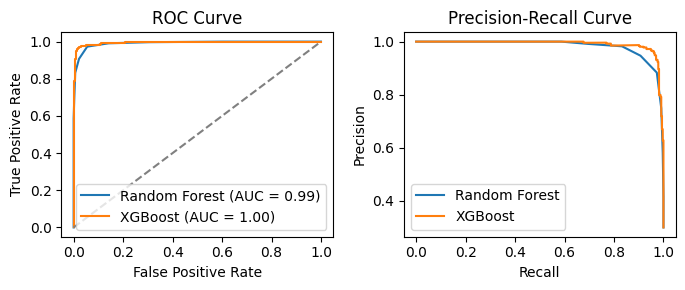

In [12]:
# For second dataset

# Compute ROC & AUC
rf2_probs = rf2_model.predict_proba(X2_test)[:, 1]  # Get probability scores
xgb2_probs = xgb2_model.predict_proba(X2_test)[:, 1]  # Get probability scores
fpr_rf2, tpr_rf2, _ = roc_curve(Y2_test, rf2_probs)
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

fpr_xgb2, tpr_xgb2, _ = roc_curve(Y2_test, xgb2_probs)
roc_auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)

# Compute Precision-Recall Curve
precision_rf2, recall_rf2, _ = precision_recall_curve(Y2_test, rf2_probs)
precision_xgb2, recall_xgb2, _ = precision_recall_curve(Y2_test, xgb2_probs)

# Plot ROC Curve & Precision-Recall Curve Side by Side
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# ROC Curve
axes[0].plot(fpr_rf2, tpr_rf2, label=f'Random Forest (AUC = {roc_auc_rf2:.2f})')
axes[0].plot(fpr_xgb2, tpr_xgb2, label=f'XGBoost (AUC = {roc_auc_xgb2:.2f})')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal baseline
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve")
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall_rf2, precision_rf2, label="Random Forest")
axes[1].plot(recall_xgb2, precision_xgb2, label="XGBoost")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()

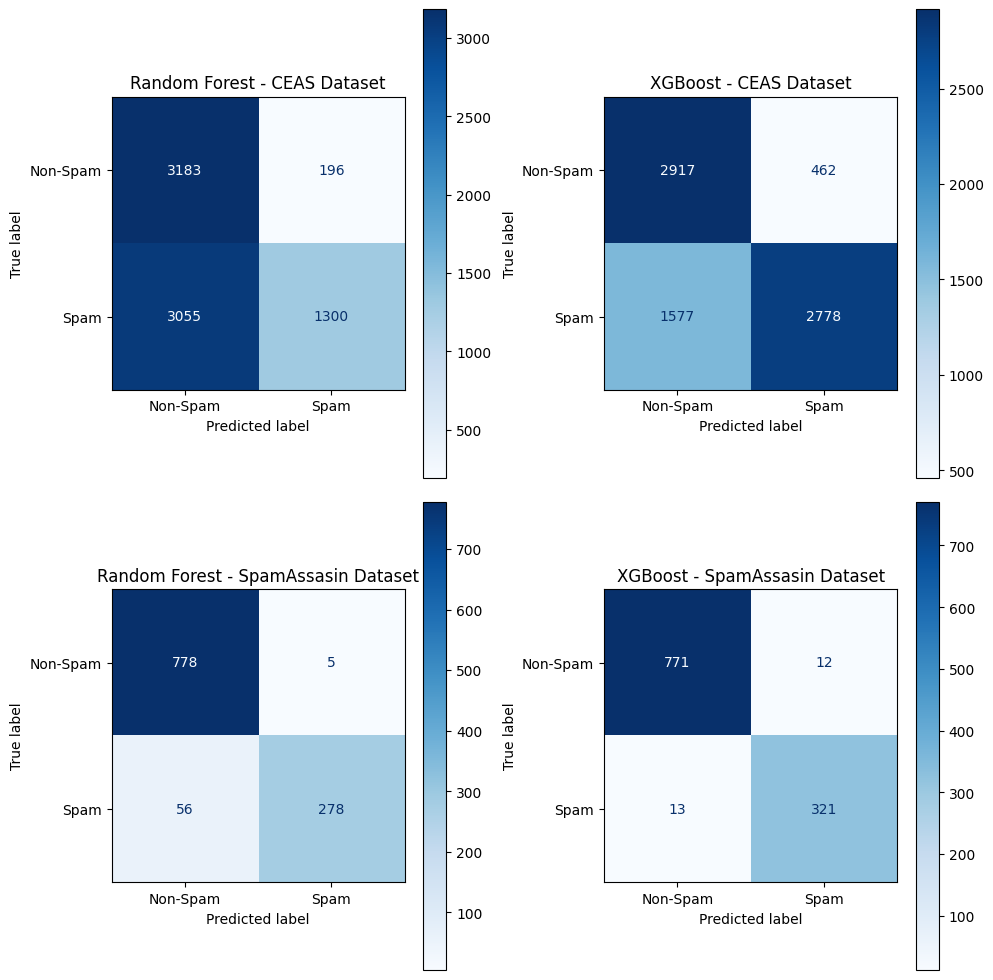

In [13]:
# Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot the confusion matrices
# Confusion matrix for Random Forest on dataset 1
cm1 = confusion_matrix(Y1_test, rf1_preds)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Non-Spam", "Spam"])
disp1.plot(ax=axes[0, 0], cmap=plt.cm.Blues)
axes[0, 0].set_title("Random Forest - CEAS Dataset")

# Confusion matrix for XGBoost on dataset 1
cm2 = confusion_matrix(Y1_test, xgb1_preds)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Non-Spam", "Spam"])
disp2.plot(ax=axes[0, 1], cmap=plt.cm.Blues)
axes[0, 1].set_title("XGBoost - CEAS Dataset")

# Confusion matrix for Random Forest on dataset 2
cm3 = confusion_matrix(Y2_test, rf2_preds)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=["Non-Spam", "Spam"])
disp3.plot(ax=axes[1, 0], cmap=plt.cm.Blues)
axes[1, 0].set_title("Random Forest - SpamAssasin Dataset")

# Confusion matrix for XGBoost on dataset 2
cm4 = confusion_matrix(Y2_test, xgb2_preds)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=["Non-Spam", "Spam"])
disp4.plot(ax=axes[1, 1], cmap=plt.cm.Blues)
axes[1, 1].set_title("XGBoost - SpamAssasin Dataset")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()